Code adapted from https://podaac.jpl.nasa.gov/forum/viewtopic.php?f=5&t=657#

In [2]:
import os
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

In [3]:
# Load GeoTiff data
fname = "GOES-East_ABI_Band2_Red_Visible_1km_2020-02-02_11-50.tiff"
ds = gdal.Open(fname)

#Get the dimentions of column and row
nc   = ds.RasterXSize
nr   = ds.RasterYSize

#Read elevation data
data = ds.ReadAsArray()

#Get Longitude and Latitude info
geotransform = ds.GetGeoTransform()
xOrigin      = geotransform[0]
yOrigin      = geotransform[3]
pixelWidth   = geotransform[1]
pixelHeight  = geotransform[5]

#Generate Longitude and Latitude array
lons = xOrigin + np.arange(0, nc)*pixelWidth
lats = yOrigin + np.arange(0, nr)*pixelHeight

In [9]:
# Load twin-otter data
import twinotter
import pathlib

path = pathlib.Path('/home/lsaffin/Documents/meteorology/data/eurec4a/twin-otter')
ds = twinotter.load_flight(path / 'flight339')

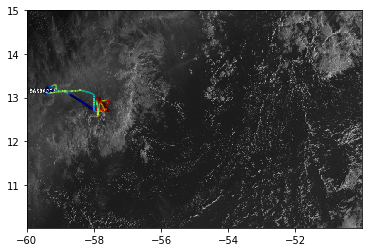

In [15]:
from twinotter import plots

# Image has RGB channels but they are all identical so just plot the first one
plt.pcolormesh(lons, lats, data[0], cmap='Greys_r')

# Overlay the flight track
plots.colored_line_plot(plt.gca(), ds.LON_OXTS, ds.LAT_OXTS, ds.ALT_OXTS/1000,
                                  vmin=0, vmax=3, cmap_steps=12, cmap='jet')

plt.savefig('test.pdf')